# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 8</span>


The variational principle in Quantum Mechanics states that the expectation value of the Hamiltonian over a (good) trial quantum state has the ground state energy $E_0$ as lower bound:

$$
\langle {\hat H} \rangle_T = 
\frac{\int dx \Psi^*_T(x) {\hat H} \Psi_T(x)}
{\int dx |\Psi_T(x)|^2} \ge E_0 =
\frac{\langle \Psi_0| {\hat H} | \Psi_0 \rangle}
{\langle \Psi_0 | \Psi_0 \rangle}
$$

During this exercise you will variationally optimize the ground state of a single quantum particle in a one dimensional (1D) space confined by the following external potential:
$$
V(x) = x^4 - \frac{5}{2}x^2
$$

This 1D quantum model is not analytically solvable and should be attacked by numerical methods. In order to obtain an approximate wave function for the ground state, the Variational Monte Carlo method uses a trial wave function, parametrized by a set of variational parameters. An approximate model for the ground state wave function is the following trial wave function:
$$
\Psi_T^{\sigma,\mu}(x) \propto e^{-\frac{(x-\mu)^2}{2\sigma^2}}+
                               e^{-\frac{(x+\mu)^2}{2\sigma^2}}
$$

$\Psi_T^{\sigma,\mu}(x)$ depends on <span style="color:red">two variational parameters: $\sigma$ and $\mu$</span>.

## Exercise 08.1

Write a Variational Monte Carlo code for a single quantum particle in 1D which exploits the Metropolis algorithm to sample the square modulus of our trial wave function $|\Psi_T^{\sigma,\mu}(x)|^2$ using an uniform transition probability $T(x_{new}|x_{old})$. By using data blocking, the code should be able to compute the expectation value for the Hamiltonian

$$
\langle {\hat H} \rangle_T = 
\frac{\int dx \Psi^*_T(x) {\hat H} \Psi_T(x)}
{\int dx |\Psi_T(x)|^2} = 
\int dx \frac{|\Psi_T(x)|^2}{\int dx |\Psi_T(x)|^2} \frac{{\hat H} \Psi_T(x)}{\Psi_T(x)}
$$

which can be used to find the parameters that minimize this quantity. Use $\hbar = 1$ and $m=1$.
<span style="color:red">Note that to measure $\langle {\hat H} \rangle_T$ you need the analytical calculation of:</span>
    
$$
\frac{{-\frac{\hbar^2}{2m}\frac{\partial^2}{\partial x^2}} \Psi_T^{\sigma,\mu}(x)}{\Psi_T^{\sigma,\mu}(x)}
$$

## Exercise 8.1 results 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import stats
#from scipy.optimize import curve_fit

To test the Variational Monte Carlo code we work on the simple case of an harmonic oscillator. The ground state is $exp(-x^2/2)$, while the ground state energy $E_0$ is 0.5.

Initially we want to check if the VMC code samples correctly the squared modulus of the ground state, i.e $exp(-x^2)$, a gaussian with $\mu=0$ and $\sigma=\frac{\sqrt2}{2}$.

In [3]:
path="DATA/"

In [4]:
def load_Y_data(path ,Y_file) : #y is the typo of observable
    X, Y, Y_err = np.loadtxt(path + Y_file ,unpack=True)
    return X, Y, Y_err

def plot_Y_data(ax, x, y, err, mu, sigma) :
    ax.errorbar(x, y, yerr=err)#, 
    ax.set_xlabel('i block')
   # ax.set_xscale("log")
    ax.set_ylabel(f"$<H_T>$")
    ax.set_title(f"$<H_T>,  $with $\mu = {mu}$ and $\sigma = {sigma}$ ")
    ax.grid(True)

In [5]:
points = np.loadtxt(path + "VMC_test_sampling.txt")


mu:  -0.005135789713749998 sigma:  0.7076586790636485


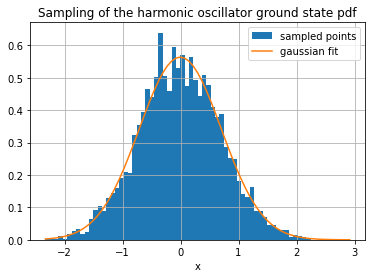

In [6]:
_, bins, _ = plt.hist(points, bins=70, density=True, label="sampled points")
mu, sigma = scipy.stats.norm.fit(points)
normal_fit = scipy.stats.norm.pdf(bins, mu, sigma)
plt.plot(bins, normal_fit, label="gaussian fit")
plt.xlabel('x')   #PROBABILMENTE È MEGLIO NORMALIZZARE IL MIO HISTOGRAMMA
plt.ylabel(r'')
plt.title('Sampling of the harmonic oscillator ground state pdf')
plt.grid()
plt.legend()

print("mu: " , mu, "sigma: ", sigma)

From the values mu and sigma of the fit, we can see that the sampled points obtained with the VMC metropolis are distributed like a gaussian of the type $exp(-x^2)$. So the sampling is done correctly. Now we want to get an estimate for the ground state energy to check that it is compatible with $E_0=0.5$.

In [12]:
filename="VMC_test_E0.txt"
x, y=np.loadtxt(path+filename, usecols=(0,1), unpack=True)

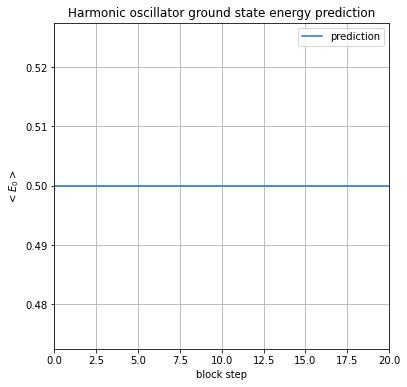

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))

ax.plot(x, y, label="prediction") 
ax.set_xlabel('block step')
ax.set_xlim([0,20])
ax.set_ylabel(f"$<E_0>$")
ax.set_title("Harmonic oscillator ground state energy prediction")
ax.legend()
ax.grid(True)

The result is trivial since $H\psi_0/\psi_0$ is 0.5 by defeinition. Though it was usefull to spot an error I missed, so never say never.


## Exercise 08.2

To find the parameters $\sigma$ and $\mu$ which minimize $\langle {\hat H} \rangle_T$, extend your Variational Monte Carlo code to face the variational optimization problem via a <span style="color:red">Simulated Annealing (SA) algorithm</span>.

Choose an appropriate starting temperature for your SA algorithm and an appropriate temperature-update-law to make the optimization work.

Compute $\langle {\hat H} \rangle_T$ with enough statistics in order to be able to measure the lowering of $\langle {\hat H} \rangle_T$ once the variational parameters are moved.

- <span style="color:red">Show a picture of $\langle {\hat H} \rangle_T$ (with statistical uncertainties) as a function of the SA steps of the algorithm</span>
- you could also show a picture of the trajectory of the SA algorithm in the variational parameter space as a function of the SA steps
- <span style="color:red">show a picture of the estimation of $\langle {\hat H} \rangle_T$ </span> and its statistical uncertainty as a function of the number of blocks/MC steps <span style="color:red">for the set of parameters which minimize $\langle {\hat H} \rangle_T$</span>
- <span style="color:red">show also a picture **of the sampled** $|\Psi_T(x)|^2$</span> by filling a histogram with the sampled configurations, moreover compare it with the analytic curve of $|\Psi_T(x)|^2$ and with the numerical solution obtained by transforming the Schrodinger equation into a matrix equation (see below the supplementary material).

### <span style="color:green">Supplementary material</span>

How can we describe a wave function as a vector? We set up a lattice of discrete points, spaced by a constant distance $dx$, and record the value of the function at each lattice point. In this way the wave function, $\Psi(x)$ become a vector:

$$
\Psi(x) \to \left[ \Psi(x_1), \Psi(x_2), ..., \Psi(x_N) \right] = 
\left[ \Psi_1, \Psi_2, ..., \Psi_N \right]
$$

The time independent Schrodinger equation 

$$
{\hat H} \Psi(x) = \left( -\frac{\hbar^2}{2m}\frac{\partial^2}{\partial x^2} + V(x) \right) \Psi(x) = E \Psi(x)
$$

can be written in matrix form. But how do we write the second derivative at a particular point? Let's start with the first derivatives:
$$
\frac{\partial}{\partial x} \Psi\left(x=(x_i+x_{i+1})/2\right) \simeq \frac{\Psi_{i+1}-\Psi_{i}}{dx}\\
\frac{\partial}{\partial x} \Psi\left(x=(x_i+x_{i-1})/2\right) \simeq \frac{\Psi_{i}-\Psi_{i-1}}{dx}
$$

Thus, we can discretize the second derivative in the following way:
$$
\frac{\partial^2}{\partial x^2} \Psi(x=x_i) =
\frac{\frac{\partial}{\partial x} \Psi\left(x=(x_i+x_{i+1})/2\right) - \frac{\partial}{\partial x} \Psi\left(x=(x_i+x_{i-1})/2\right)}{dx} =
\frac{\Psi_{i+1}-2\Psi_{i}+\Psi_{i-1}}{dx^2}
$$

We finally obtain:

$$
\begin{bmatrix}
 \frac{\hbar^2}{m\,dx^2}+V(x_1)& -\frac{\hbar^2}{2m\,dx^2} & 0 & \dots  & 0 \\
-\frac{\hbar^2}{2m\,dx^2} & \frac{\hbar^2}{m\,dx^2}+V(x_2) & -\frac{\hbar^2}{2m\,dx^2} & \dots  & 0 \\
 0                        & -\frac{\hbar^2}{2m\,dx^2} & \frac{\hbar^2}{m\,dx^2}+V(x_3) & \dots  & 0 \\
 \vdots                   & \vdots                    & \vdots & \ddots & \vdots \\
 0                    & 0                & 0 & \dots  & \frac{\hbar^2}{m\,dx^2}+V(x_N)
\end{bmatrix}
\begin{bmatrix}
\Psi_{1} \\
\Psi_{2} \\
\vdots \\
\Psi_{N}
\end{bmatrix}
= E
\begin{bmatrix}
\Psi_{1} \\
\Psi_{2} \\
\vdots \\
\Psi_{N}
\end{bmatrix}
$$

To solve the time independent Schrodinger equation we therefore have to find eigenstates and eigenvalues of the matrix just obtained.

Ground state energy:  -0.46046587969271535
1st excited state energy:  0.09742471331761199
2nd excited state energy:  1.971733134393021


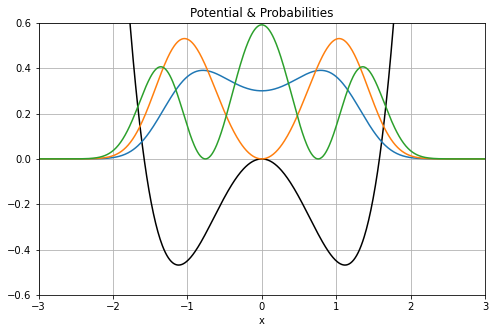

In [22]:
import numpy as np
import matplotlib.pyplot as plt

def Vpot(x):
    return (x**2 - 2.5)*x**2
    #return 0.5*x**2

hbar = 1
m = 1
a = 10
N = 1000 # number of iterations

# Step sizes
x = np.linspace(-a/2, a/2, N)
dx = x[1] - x[0] # the step size
V = Vpot(x)

# The central differences method: f" = (f_1 - 2*f_0 + f_-1)/dx^2

CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
# np.diag(np.array,k) construct a "diagonal" matrix using the np.array
# The default is k=0. Use k>0 for diagonals above the main diagonal, 
# and k<0 for diagonals below the main diagonal

# Hamiltonian matrix
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)

# Compute eigenvectors and their eigenvalues
E,psi = np.linalg.eigh(H)

# Take the transpose & normalize
psi = np.transpose(psi)
psi = psi/np.sqrt(dx)

print("Ground state energy: ", E[0])
print("1st excited state energy: ", E[1])
print("2nd excited state energy: ", E[2])

# Plot a few things
plt.figure(figsize=(8,5))
scale = 0.3
plt.plot(x, scale*V, color="Black", label="Potential") # plot the potential
plt.plot(x,(psi[0])**2)
plt.plot(x,(psi[1])**2)
plt.plot(x,(psi[2])**2)
plt.title("Potential & Probabilities")
plt.xlabel("x")
plt.grid(True)
plt.xlim((-3,3))
plt.ylim((-0.6,0.6))
plt.show()

## Exercise 8.2 results

### The approach

We want to find the parameters $\mu$ and $\sigma$ which correpsond to the ground state, using a Simulated Annealing (SA) algorithm. The idea underlying the SA is to sample, with a metropolis algorithm, a Bolztman weight with free energy identified with the cost function $L(\vec x)$ of the problem; $\vec x $ represent an istance of the parameters, or a equivalently a point of the parameters space. In this way by slowly decreasing the temperature the metropolis algorithm sample the parameter's space to find the configuration which minimize the cost function. The idea is based on the minimization principle found in nature, and used in statistical mechanics. The slow cooling process is necessary to ensure ergodicity in the parameters space, in order to explore correctly the space and try to avoid to get stuck in a local minimum which doesn't give a good enough approximation of the ground state, according to our need. 

observations: 

- In this exercise we use two Metropolis algorithms, one for obtaining an esitmate of the trial energy $E_T$ (VMC Metropolis), and one for the sampling of the Boltzman weight (SA Metropolis). 

- The VMC metroplis allow us to have an estimate of the energy with its error. To obtain this it samples an analytical function (the pdf associated to the trial wavefunction). The SA metropolis doesn't sample an analityc function, but samples the Boltzman weight with the energy trial values as cost function. These energy trials comes with their errors, so the evaluation of the energy variation, from a move to another, must be done carefully. This is the first time we apply a Metropolis of this type. To deal with this problem we implemented a check_compatibility method. The idea is to try to obatin estimates of the energy Hold and Hnew that are not compatible. This is done by adding blocks and statistics to the HNew estimate, in order to reduce it's error.

To implement this simulated annealing algorithm we could try to implement one of the two following schemes, here represented schematically.

A) 
Chose a chain of pairs of temperature and number of metropolis steps to termalize the Metropolis at the given temperature $T_i$, N($T_i$). This is called an annealing schedule. In this case we would implement the following schema.

    for i in SA_step
        SA.find_step()        //find random walk step to ensure 50% acceptance rate for SA Metropolis
        for j in N(T_i)       // N(T_i) sufficent to thermalize the system at the given temperature
            get_Hold()        //energy esitmate with VMC Metropolis
            move_parameters() //changes $\mu$ and $\sigma$
            VMC.find_step() //determines the step of the VMC Metropolis (necessary as mu and sigma have changed)
            get_HNew()
            check_compatibility(HNew, Hold)  // a do while which try to obtain not compatible estimates
            metropolis(Hnew, Hold)           //SA metropolis
        update_temperature(T)                //update temperatuer


with this approach we should need to know N($T_i$) for the range of temperatures we have. This to me is not trivial, since as T goes down the exponential becomes always more peaked, and equilibration becomes fundamental to sample correctly the Boltzman weight.
To avoid this situation we implement a slightly different scheme, which basically puts N($T_i$)=1, but with $T_i$ that changes really slowly. (In our code SA_step=1000 and $T_{i+1}=0.99T_i$. If $T$ varies slowly we don't need to equilibrate the SA metropolis, as the Hold estimates was carried at a mostly identical temperature of Hnew estimate. So the scheme we try to use is simply:
        
B)
 
     for i in SA_step
            get_Hold()
            move_parameters() //changes $\mu$ and $\sigma$
            VMC.find_step() //necessary as the parameters have changed
            get_HNew()
            check_compatibility(HNew, Hold)
            metropolis(Hnew, Hold)
            update_temperature(T) 
            SA.find_step()



The method find_step for the VMC Metropolis is implemented as a method class, in VMC.cpp. It finds the step length automatically, registering the acceptance ratio of the metropolis and increasing or decreasing the step as necessary, till the acceptance rate is in the range desired.

Instead the implementation of the SA find_step had some problems, mostly realted to the fact that the SA algorithm doesn't sample an analytical pdf. So the SA random walk steps are given in a vector and the value change every 100 moves of the SA algorithm. There is a part of the code in the main which allows to check the acceptance rate every 100 SA moves, for the current value of the SA step. So basically we made some trial runs and modified the values in "vector<double> delta" to obtain the 50% rate.

### Temperature law

In [39]:
import numpy as np
import matplotlib.pyplot as plt

In [40]:
path="DATA/"

In [41]:
fname1="SA_geometric_T.txt"
fname2="geom_corr_T.dat"

In [26]:
b1 = np.loadtxt(path + fname1)
#b2 = np.loadtxt(path + fname2)
x=np.arange(len(b1))


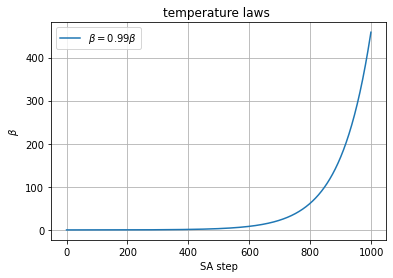

In [27]:
plt.plot(x, b1, label=r"$\beta=0.99\beta$")
#plt.plot(x, b2, label=r"$\beta=(0.9+(i/10xNsa_step))\beta$")#non ha senso
plt.xlabel('SA step')
# ax.set_xscale("log")
plt.ylabel(r"$\beta$")
plt.title("temperature laws ")
plt.legend();
plt.grid(True)

### Questions 1 and 2

In [28]:
path="DATA/"
fname1="SA_Ht_blocking.txt"
fname2="SA_parameters.txt"

In [29]:
def load_Y_data(path ,Y_file) : 
    X, Y, Y_err = np.loadtxt(path + Y_file ,unpack=True)
    return X, Y, Y_err

def plot_Y_data(ax, x, y, err) :
    ax.errorbar(x, y, yerr=err)#, 
    ax.set_xlabel('i block')
   # ax.set_xscale("log")
    ax.set_ylabel(f"$<H_T>$")
    ax.set_title(f"$<H_T>$, data blocking from minimization procedure ")
    ax.grid(True)

In [30]:
x, Ht, Ht_err=load_Y_data(path ,fname1)
mu, sigma=np.loadtxt(path + fname2 ,unpack=True)

N_color=4
Color=["r", "g", "b", "m"]
l=int(len(mu)/N_color)
i=0


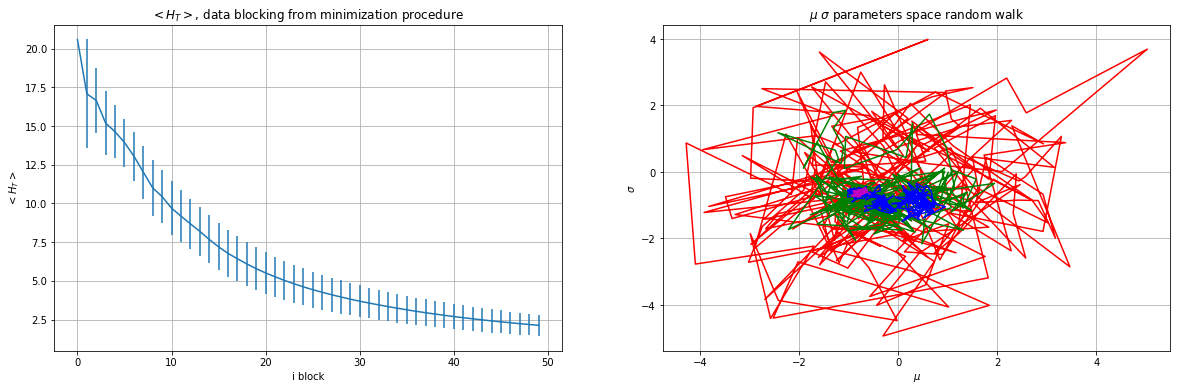

In [31]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(20, 6))

plot_Y_data(ax1, x, Ht, Ht_err)
for i in range(N_color) :
    ax2.plot(mu[i*l:(i+1)*l], sigma[i*l:(i+1)*l], Color[i])
ax2.set_xlabel(f"$\mu$")
ax2.set_ylabel(f"$\sigma$")
ax2.set_title(r"$\mu$ $\sigma$ parameters space random walk")
ax2.grid(True)

On the left there is the running average of the trial energies found during the SA algorithm evolution. The fact that is decreasing is a signal that the algorithm is able to lower the energy, but this plot has no information about the minima found.

On the right instead there is the trajectory followed in the parameters sapce. The different colors represent 250 SA moves out of a total of 1000. It is eveident how the algorithm while evolving starts to focus on a region always smaller.

### Question 3

In [42]:
fname3="SA_Hmin_blocking.txt"

In [43]:
def load_Y_data(path ,Y_file) : #y is the typo of observable
    X, Y, Y_err = np.loadtxt(path + Y_file ,unpack=True)
    return X, Y, Y_err

def plot_Y_data(ax, x, y, err, mu, sigma) :
    ax.errorbar(x, y, yerr=err, label="simulated annealing prediction")#, 
    ax.set_xlabel('i block')
   # ax.set_xscale("log")
    ax.set_ylabel(r"$<H_{min}>$")
    ax.set_title(r"$<H_{min}>$" + f"  with $\mu = {mu}$ and $\sigma = {sigma}$ ")
    ax.grid(True)

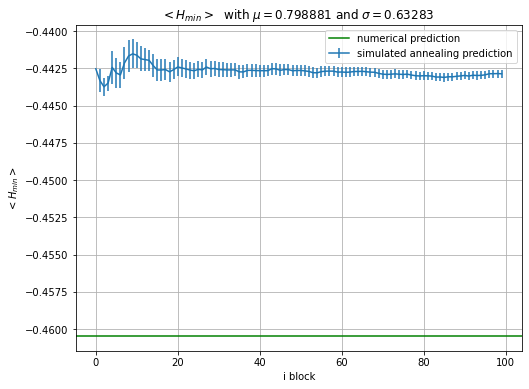

In [44]:
mu_min=0.798881
sigma_min=0.63283

teo=E[0]
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
x, Hmin, Hmin_err=load_Y_data(path ,fname3)
plot_Y_data(ax, x, Hmin, Hmin_err, mu_min, sigma_min)
ax.axhline(y=teo, color='g', linestyle='-', label="numerical prediction")
ax.legend()

The results are not compatible with the numerical prediction found above. I guess what we are finding is an approximation to the real ground state. It is up to our need to decide wheter this approximation is good enough or not

### Question 4

In [35]:
fname4="ground_state_pdf.txt"

In [36]:
def fun(x, mu, sigma) :
    return (1/abs(sigma)*(2*np.pi)**(0.5))*(np.exp(-(x-mu)**2/(2*sigma**2))+ np.exp(-(x+mu)**2/(2*sigma**2)))

In [37]:
from sklearn import preprocessing
x = np.linspace(-a/2, a/2, N)
y=fun(x, mu_min, sigma_min)
appo=np.column_stack([x,y])
y_norm=preprocessing.normalize(appo)
#print(y_norm[:,1])

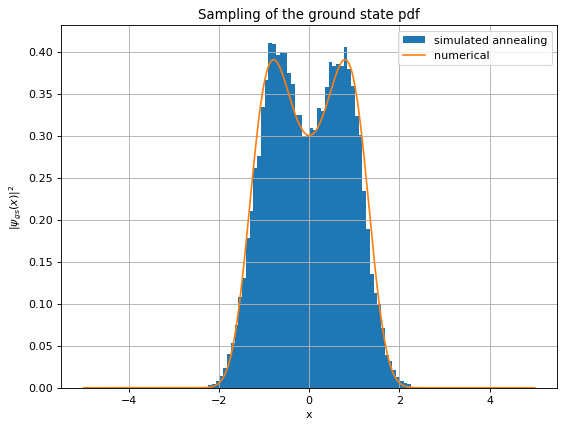

In [38]:
gs_pdf = np.loadtxt(path + fname4)
x = np.linspace(-a/2, a/2, N)

#plt.plot(x, y, label="analytical")
#plt.plot(x, y_norm[:,1], label="analytical")
plt.figure(figsize=(8, 6), dpi=80)
plt.hist(gs_pdf, bins=70, density=True, label="simulated annealing")
plt.plot(x,(psi[0])**2, label="numerical ") 
plt.xlabel('x') 
plt.ylabel(r'$|\psi_{gs}(x)|^2$')
plt.title('Sampling of the ground state pdf')
plt.grid()
plt.legend()